## 1. Load Data

In [2]:
import tensorflow as tf
import os

In [3]:
os.listdir('dataset')

['Aluvial',
 'Andosol',
 'Entisol',
 'Humus',
 'Inceptisol',
 'Kapur',
 'Laterit',
 'Pasir']

In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [263]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [5]:
data = tf.keras.utils.image_dataset_from_directory('dataset')

Found 880 files belonging to 8 classes.


In [14]:
class_names = data.class_names
print("Class Names:", class_names)

Class Names: ['Aluvial', 'Andosol', 'Entisol', 'Humus', 'Inceptisol', 'Kapur', 'Laterit', 'Pasir']


In [16]:
class_indices = {class_name: index for index, class_name in enumerate(class_names)}
print("Class Indices:", class_indices)

Class Indices: {'Aluvial': 0, 'Andosol': 1, 'Entisol': 2, 'Humus': 3, 'Inceptisol': 4, 'Kapur': 5, 'Laterit': 6, 'Pasir': 7}


In [7]:
data_iterator = data.as_numpy_iterator()

In [23]:
batch = data_iterator.next()

In [9]:
batch[0].shape

(32, 256, 256, 3)

In [10]:
batch[1]

array([1, 6, 3, 2, 6, 6, 2, 5, 2, 5, 1, 7, 1, 0, 4, 1, 4, 1, 0, 6, 3, 0,
       3, 0, 0, 1, 2, 0, 0, 6, 4, 6])

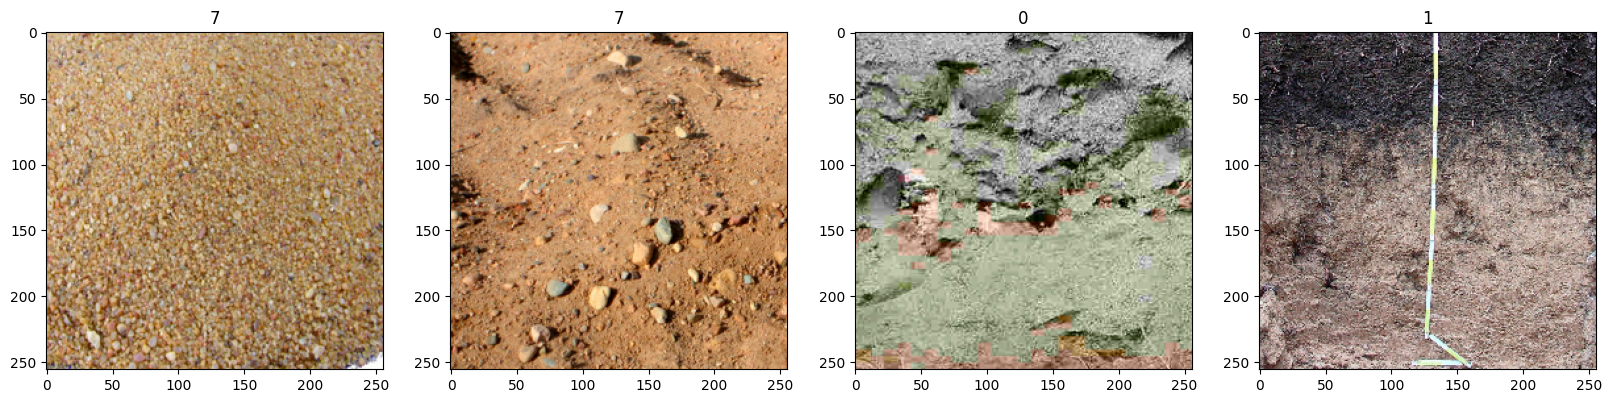

In [24]:
#visualize image label class 0=cat 1=dog
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 2. Preprocessing Data

### 2.1 Scale Data

In [25]:
data = data.map(lambda x, y: (x/255, y))

In [26]:
scaled_iterator = data.as_numpy_iterator()

In [27]:
batch = scaled_iterator.next()

In [28]:
batch[0]

array([[[[6.90077126e-01, 6.82233989e-01, 7.25371242e-01],
         [6.82950854e-01, 6.75290108e-01, 7.18336165e-01],
         [6.91749454e-01, 6.91536248e-01, 7.31390476e-01],
         ...,
         [6.39576137e-01, 6.67088389e-01, 6.97725654e-01],
         [6.70041084e-01, 6.86000943e-01, 7.32692838e-01],
         [6.82323277e-01, 6.98009551e-01, 7.41177440e-01]],

        [[6.84683502e-01, 6.76749885e-01, 7.19884992e-01],
         [7.37760186e-01, 7.30008960e-01, 7.72870481e-01],
         [8.33484828e-01, 8.25733602e-01, 8.68573606e-01],
         ...,
         [6.85083270e-01, 7.01198459e-01, 7.35458076e-01],
         [6.93119526e-01, 7.09081531e-01, 7.55499125e-01],
         [6.89308345e-01, 7.05270350e-01, 7.48161793e-01]],

        [[7.68549442e-01, 7.57149994e-01, 7.99739361e-01],
         [8.31432402e-01, 8.27510834e-01, 8.58883381e-01],
         [9.48010743e-01, 9.44089174e-01, 9.74578500e-01],
         ...,
         [6.73920989e-01, 7.01065600e-01, 7.24583030e-01],
         [

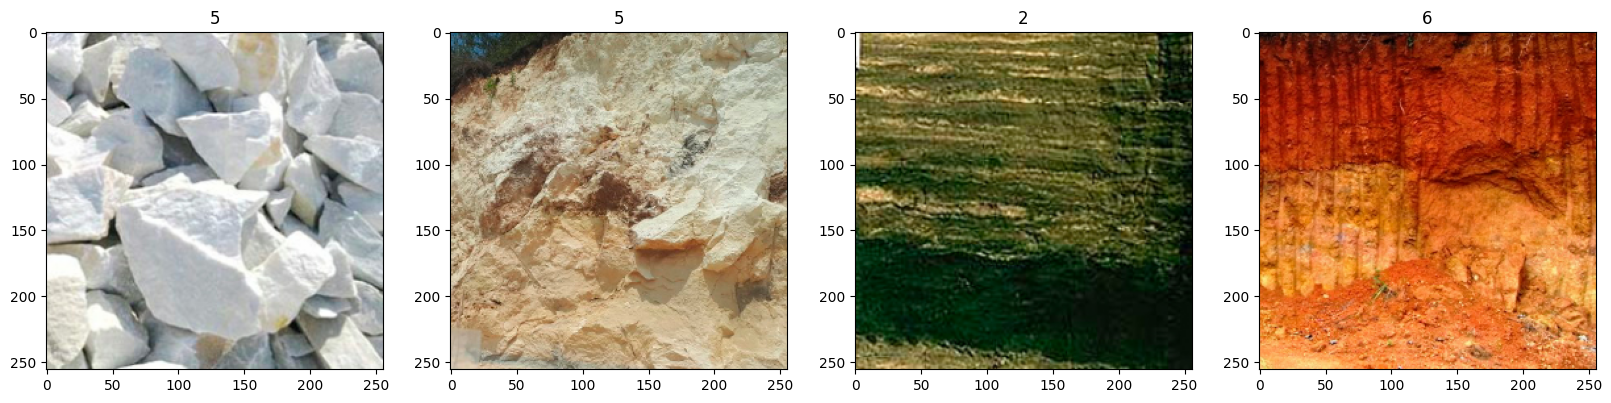

In [29]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### 2.2 Split Data

In [30]:
len(data)

28

In [32]:
# Train_size = 3, Val_size = 1, test_size = 1
train_size = int(len(data)*.7)
val_size = int(len(data)*.2) +1
test_size = int(len(data)*.1) +1

In [33]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [34]:
len(train), len(val), len(test)

(19, 6, 3)

## 3. CNN Model

### 3.1 Build Model

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [37]:
model = Sequential()

In [38]:
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(8, activation='softmax'))

In [39]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)       

### 3.2 Train Model

In [42]:
logdir = 'log'

In [43]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [44]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


19/19 [==============================] - 15s 656ms/step - loss: 2.1321 - accuracy: 0.2237 - val_loss: 1.6324 - val_accuracy: 0.4219
Epoch 2/20
19/19 [==============================] - 10s 501ms/step - loss: 1.5630 - accuracy: 0.4211 - val_loss: 1.2422 - val_accuracy: 0.5156
Epoch 3/20
19/19 [==============================] - 12s 592ms/step - loss: 1.3465 - accuracy: 0.4901 - val_loss: 1.2857 - val_accuracy: 0.5000
Epoch 4/20
19/19 [==============================] - 11s 537ms/step - loss: 1.2156 - accuracy: 0.5592 - val_loss: 1.1252 - val_accuracy: 0.6042
Epoch 5/20
19/19 [==============================] - 11s 562ms/step - loss: 1.0933 - accuracy: 0.6184 - val_loss: 1.1192 - val_accuracy: 0.5990
Epoch 6/20
19/19 [==============================] - 12s 582ms/step - loss: 1.0126 - accuracy: 0.6464 - val_loss: 1.0010 - val_accuracy: 0.6146
Epoch 7/20
19/19 [==============================] - 11s 561ms/step - loss: 0.9455 - accuracy: 0.6595 - val_loss: 0.8654 - val_accuracy: 0.69

In [45]:
hist.history

{'loss': [2.13214373588562,
  1.5630407333374023,
  1.346451759338379,
  1.2156273126602173,
  1.0933372974395752,
  1.0125662088394165,
  0.945534884929657,
  0.7263297438621521,
  0.7329103350639343,
  0.6650869250297546,
  0.5360423922538757,
  0.4310483932495117,
  0.32412004470825195,
  0.5241023302078247,
  0.42684847116470337,
  0.331649512052536,
  0.2856908142566681,
  0.1980249434709549,
  0.1237921491265297,
  0.09048116952180862],
 'accuracy': [0.22368420660495758,
  0.42105263471603394,
  0.49013158679008484,
  0.5592105388641357,
  0.6184210777282715,
  0.6463815569877625,
  0.6595394611358643,
  0.7664473652839661,
  0.7483552694320679,
  0.7796052694320679,
  0.8453947305679321,
  0.8700658082962036,
  0.8848684430122375,
  0.8371710777282715,
  0.8684210777282715,
  0.8963815569877625,
  0.9177631735801697,
  0.9440789222717285,
  0.9638158082962036,
  0.9802631735801697],
 'val_loss': [1.632449746131897,
  1.242190957069397,
  1.285699486732483,
  1.1252270936965942,


## 4. Evaluate Performance

### 4.1 Plot Performance

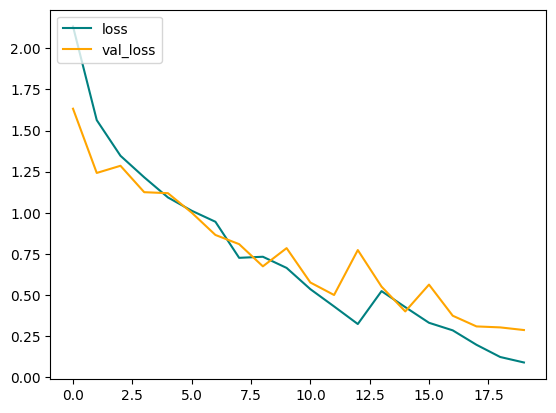

In [46]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
plt.legend(loc='upper left')
plt.show()

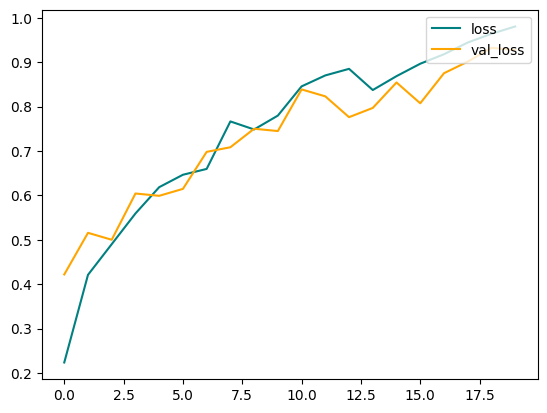

In [47]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='loss')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_loss')
plt.legend(loc='upper right')
plt.show()

### 4.2 Test

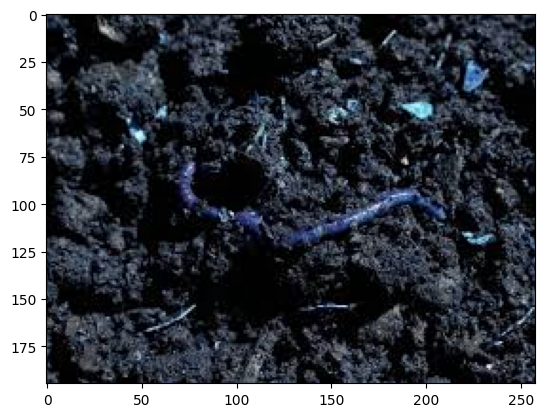

In [89]:
import cv2
import imghdr
img = cv2.imread('Humus_test.jpeg')
plt.imshow(img)
plt.show()

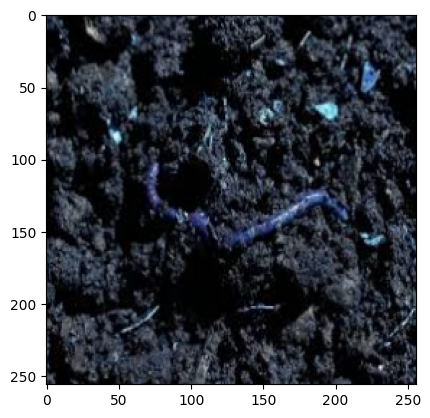

In [90]:
resize = tf.image.resize(img, (256,256,))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [91]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 24ms/step


In [92]:
np.argmax(yhat)

3

In [93]:
if np.argmax(yhat) == 0:
    print(f'Predicted class is Aluvial')
elif np.argmax(yhat) == 1:
    print(f'Predicted class is "Andosol')
elif np.argmax(yhat) == 2:
    print(f'Predicted class is "Entisol')
elif np.argmax(yhat) == 3:
    print(f'Predicted class is "Humus')
elif np.argmax(yhat) == 4:
    print(f'Predicted class is "Inceptisol')
elif np.argmax(yhat) == 5:
    print(f'Predicted class is "Kapur')
elif np.argmax(yhat) == 6:
    print(f'Predicted class is "Laterit')
elif np.argmax(yhat) == 7:
    print(f'Predicted class is "Pasir')

Predicted class is "Humus


## 5. Save Model

In [94]:
model.save(os.path.join('models', 'model.h5'))

C:\Users\MSI GF63\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [95]:
model.save(os.path.join('models', 'model.json'))

INFO:tensorflow:Assets written to: models\model.json\assets


INFO:tensorflow:Assets written to: models\model.json\assets
